# Exercise 1:
In this exercise you will program a simple neural network with numpy. The tasks will be:
1. Implementing a Forward propagation
2. Completing the Forward propagation by computing the loss
3. Implementing a Back propagation
4. Training the neural network

You will implement code in 'nn.py' and test your implementations with the code provided below.

In [45]:
# Neural Network Classifier

import numpy as np
import time

class TwoLayerNet(object):

    def __init__(self, input_dim, hidden_dim, output_dim, std=1e-4):
       
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_dim, hidden_dim)
        self.params['b1'] = np.zeros(hidden_dim)
        self.params['W2'] = std * np.random.randn(hidden_dim, output_dim)
        self.params['b2'] = np.zeros(output_dim)
        
    def loss_grad(self, X, y=None, reg=0.0):
        
        # Unpack variables from the params dictionary
    
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2'] 
        b2 = self.params['b2']
        N, D = X.shape
       
        #--------------------------------------- forward propagation --------------------------------------- 
        
        scores = None
        loops = True
        
        if loops == False:
            
            # Task 1.1:
            
            # Compute the class scores for the input.
            # Use the weights and biases to perform a forward propagation and store the results
            # in the scores variable, which should be an array of shape (N, C).
            # Start with a naive implementation with at least 2 loops.
            
            pro_1 = [[ 0 for i in range(len(W1[0]))] for j in range(len(X))]

            # Insert a for loop for matrix product of X & W1

            for i in range(len(X)):
                # iterate through columns of Y
                for j in range(len(W1[0])):
                    #iterate through rows of Y
                    for k in range(len(W1)):
                        pro_1[i][j] += X[i][k] * W1[k][j]

            # Find the sum z2

            z2 = pro_1 + b1

            # Implement ReLu
            
            a2 = np.maximum(0, z2)

            # Insert a for loop for matrix product of a2 & w2

            pro_2 = [[ 0 for i in range(len(W2[0]))] for j in range(len(a2))]

            for i in range(len(a2)):
                # iterate through columns of Y
                for j in range(len(W2[0])):
                    #iterate through rows of Y
                    for k in range(len(W2)):
                        pro_2[i][j] += a2[i][k] * W2[k][j]

            scores = pro_2 + b2
        
        else:
            
            # Task 1.2:
            
            # Now implement the same forward propagation as you did above using no loops.
            # If you are done set the parameter loops to False to test your code. 
        
            z2 = np.dot(X, W1) + b1
            a2 = np.maximum(0, z2)
            scores = np.dot(a2, W2) + b2

        
        if y is None:
            return scores
        
        #--------------------------------------- loss function ---------------------------------------------

        loss = None
        
        # Task 2:
        
        # Compute the loss with softmax and store it in the variable loss. Include L2 regularization for W1 and W2.
        # Make sure to handle numerical instabilities.
        
        # Softmax 
        exp_scores = np.exp(scores - np.amax(scores)) 
        probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
        
        # Cross entropy loss
        log_probs = -np.log(probs[range(N), y])
        cross_entropy_loss = np.sum(log_probs) / N
        
        # Regularization
        regularizer = ((reg * np.sum(np.square(W1))) + (reg * np.sum(np.square(W2))))
        
        # Loss function
        loss = cross_entropy_loss + regularizer
        
        #--------------------------------------- back propagation -------------------------------------------
        
        grads = {}   
        
        # Task 3: 
        
        # Compute the derivatives of the weights and biases (back propagation).
        # Store the results in the grads dictionary, where 'W1' referes to the gradient of W1 etc.
        
        def reluDerivative(r):
            r[r<=0] = 0
            r[r>0] = 1
            return r
        
        dw_scores = probs
        dw_scores[range(N), y] -= 1
        dw_scores = dw_scores / N
        
        # dLoss/dW2
        dW_2 = np.dot(a2.T, dw_scores) + (2 * reg * W2)
        
        # dLoss/db2
        db_2 = np.sum(dw_scores, axis = 0, keepdims = True)
        
        # dLoss/dW1
        dW_1 = np.dot(X.T, (np.dot(dw_scores, W2.T)) * reluDerivative(a2)) + (2 * reg * W1)
        
        # dLoss/db1
        db_1 = np.sum(np.dot(dw_scores, W2.T) * reluDerivative(a2), axis = 0, keepdims = True)

        grads.update({"W1": dW_1, "W2": dW_2, "b1": db_1, "b2": db_2})
        return loss, grads

    
    def train(self, X, y, X_val, y_val,
          learning_rate=1e-3, learning_rate_decay=0.95,
          reg=5e-6, num_iters=100,
          batch_size=200, verbose=False):

        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(num_iters):
            X_batch = None
            y_batch = None
                
        # Task 4.1:
        
        # Create a random minibatch of training data X and labels y, and stor
        # them in X_batch and y_batch.
            
            minis = []

            np.random.seed(0)
            num_train = X.shape[0]
            rand_indices = np.random.choice(np.arange(num_train), size = 1000, replace = True)
            X_b = X[rand_indices, :]
            y_b = y[rand_indices]
            n_minibatches = X_b.shape[0] // batch_size

            i = 0

            for i in range(n_minibatches):
                mini_X = X_b[i * batch_size:(i + 1)*batch_size, :]
                mini_y = y_b[i * batch_size:(i + 1)*batch_size]

                X_bat = mini_X[:, :]
                y_bat = mini_y[:]
                minis.append((X_bat, y_bat))
                
            mini_batch = minis 
                           
            for mini in mini_batch:
                
                X_batch, y_batch = mini
                
                # Compute the Loss & Gradients of current minibatch
            
                loss, grads = self.loss_grad(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)
                
            
            # Task 4.2:
            
            # Update the parameters of the network (in self.params) by using stochastic gradient descent. 

                self.params['W1'] = self.params['W1'] - (learning_rate * grads["W1"])
                self.params['W2'] = self.params['W2'] - (learning_rate * grads["W2"])
                self.params['b1'] = self.params['b1'] - (learning_rate * grads["b1"])
                self.params['b2'] = self.params['b2'] - (learning_rate * grads["b2"])

                # Decay learning rate
                learning_rate *= learning_rate_decay

            if verbose and it % 10 == 0:
                print('iteration %sd / %d: loss %f' % (it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

        
        return {

            'loss_history': loss_history,
            'train_acc_history': train_acc_history,
            'val_acc_history': val_acc_history

        }
    
    
    def predict(self, X):
    
        y_pred = None
        
        # Task 4.3: 
        
        # Implement this function to predict labels for the data points.
        
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2'] 
        b2 = self.params['b2']
        
        a2 = np.maximum(0, np.dot(X, W1) + b1)
        scores = np.dot(a2, W2) + b2
        y_pred = np.argmax(scores, axis = 1)
        
        return y_pred

In [46]:
# This code initializes the network (see __init__ in nn.py) and some other functions needed later. 
# The input data (X) with the associated labels (y) as well as the weights and biases 
# are initialized with random numbers. A seed is set to make your results comparable.

import numpy as np
import matplotlib.pyplot as plt

input_dim = 4
hidden_dim = 10
num_classes = 3
num_inputs = 5

def init_net():
    np.random.seed(0)
    return TwoLayerNet(input_dim, hidden_dim, num_classes, std=1e-1)

def init_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_dim)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

net = init_net()
X, y = init_data()

# Forward propagation
Go to 'nn.py' to implement the Forward propagation in the loss_grad function (Task 1.1 and Task 1.2).
Then test the code below to check your results.

In [47]:
scores = net.loss_grad(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()
# The difference should be very small. (< 1e-7)
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Time difference
Add code to measure the time of your naive implementation with at least 2 loops and the implementation with no loops and fill in your results below. 
Note that 'time' is already imported in the 'nn.py' file which you can use for the time measurement. 

Duration with 2 loops:

Duration without loops:

# Forwardpass loss
Complete the forward propagation by implementing the loss function in 'nn.py' (Task 2).
Run the code below to check your implementation.

In [48]:
loss, _= net.loss_grad(X, y, reg=0.05)
correct_loss = 1.30378789133
print(loss)

# should be very small, (< 1e-12)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.3037878913298206
Difference between your loss and correct loss:
1.794120407794253e-13


# Numerical issues with Softmax

Please describe the two main issues that can lead to numerical instability when using the softmax function? Describe a/your approach of avoiding instabilities with softmax.

# Back propagation
Now implement the Back propagation in 'nn.py' (Task 3) in the loss_grad function.
Test the code below to check your results.

In [49]:
from eval_grad import numerical_grad

# Here we use a numeric gradient to check your implementation of the back propagation.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss_grad(X, y, reg=0.05)

# these should all be less than 1e-8
for param_name in grads:
    f = lambda W: net.loss_grad(X, y, reg=0.05)[0]
    param_grad_num = numerical_grad(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865091e-11


# Training a network
Finaly we want to train our network. For this purpose go to 'nn.py' and implement the train and predict function (Task 4.1, 4.2 and 4.3).
Then test the code below to check your results.

iteration 0d / 100: loss 0.437614
iteration 10d / 100: loss 0.016142
iteration 20d / 100: loss 0.014579
iteration 30d / 100: loss 0.014469
iteration 40d / 100: loss 0.014461
iteration 50d / 100: loss 0.014460
iteration 60d / 100: loss 0.014460
iteration 70d / 100: loss 0.014460
iteration 80d / 100: loss 0.014460
iteration 90d / 100: loss 0.014460
Final training loss:  0.014460416251124625


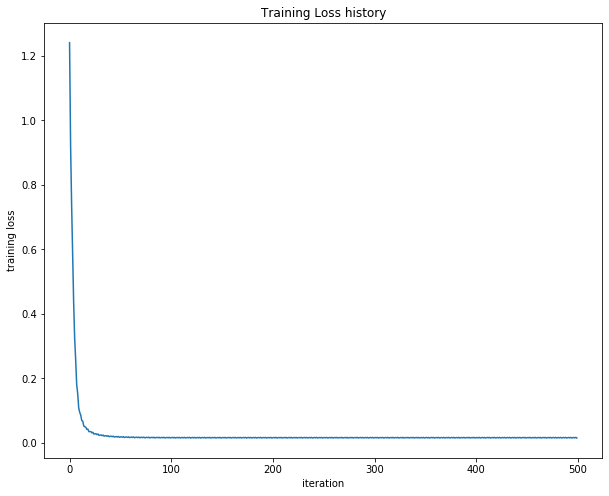

In [58]:
net = init_net()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Iterations
Please explain at least how many iterations are useful for training this neural network (use the plot above for your explanation)?